In [1]:
import pandas as pd
import seaborn as sns
sns.set(style='darkgrid')

df = pd.read_excel('Base de datos prueba tecnica.xlsx', sheet_name='DB')
pd.options.display.max_columns = 100
df.head(5)
df.shape

(19942, 22)

# Descripción de datos
A partir de la visualizacion de las muestras podemos generar una tabla descriptiva con el tipo de dato presente en cada variable a analizar. 

In [2]:
f = pd.DataFrame({'Tipo de variable': ['Categorica', 'Categorica binaria', 
                                       'Numerica discreta', 'Numerica Continua', 'Otros'], 
                 'variables': ['REGIONAL, DEPARTAMENTO, TECNOL, GERENCIA, CANAL_HOMOLOGADO_MILLICON, '
                                     'productos, portafolio, tipo_fuerza_venta, fallo',
                               'asesoria_factura, pedidos_peticiones, reagendamiento, asesoria_servicios,'
                               'retencion, Otras, quejas_fraude, traslado',
                               'estrato, no_serv_tecnicos',
                               'antiguedad_meses', 'cliente_id']})
pd.set_option('display.max_colwidth', None)
display(f)

,Tipo de variable,variables
0,Categorica,"REGIONAL, DEPARTAMENTO, TECNOL, GERENCIA, CANAL_HOMOLOGADO_MILLICON, productos, portafolio, tipo_fuerza_venta, fallo"
1,Categorica binaria,"asesoria_factura, pedidos_peticiones, reagendamiento, asesoria_servicios,retencion, Otras, quejas_fraude, traslado"
2,Numerica discreta,"estrato, no_serv_tecnicos"
3,Numerica Continua,antiguedad_meses
4,Otros,cliente_id


Ademas, visualizamos una descripción general de los datos generando una tabla con la *cantidad de muestras* presentes para cada posible valor de las columnas (variables). 

In [3]:
# Creamos una tabla con el conteo de frecuencia para cada columna
# en la base de datos. 

cols = df.columns.tolist()
[cols.remove(key) for key in ['cliente_id', 'antiguedad_meses']] #retiramos variables numericas

overview = (pd.DataFrame(
    df[cols]
    .melt(var_name='column', value_name='value')
    .value_counts())
.rename(columns={0: 'counts'})
.sort_values(by=['column', 'counts']))
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(overview)

counts
column                    value                                 
CANAL_HOMOLOGADO_MILLICON OTROS                               90
                          CONSTRUCTORES                      189
                          DIGITALES                          368
                          URBANIZACIONES                     530
                          RETAIL                             864
                          DEALERS                           1049
                          OUT BOUND                         1480
                          FVD                               3396
                          IN BOUND                          3459
                          TIENDAS                           3749
                          SAC                               4768
DEPARTAMENTO              HUILA                                1
                          LA GUAJIRA                           1
                          NARINO                               1
                          BOYACA                              27
                          CAUCA                               37
                          META                                51
                          NORTE DE SANTANDER                  74
                          MAGDALENA                          108
                          TOLIMA                             126
                          SUCRE                              141
                          ATLÁNTICO                          183
                          CESAR                              265
                          ATLANTICO                          271
                          QUINDIO                            364
                          CORDOBA                            370
                          CALDAS                             512
                          BOLIVAR                            795
                          SANTANDER                          797
                          RISARALDA                          971
                          VALLE DEL CAUCA                   1422
                          CUNDINAMARCA                      1770
                          ANTIOQUIA                        11655
GERENCIA                  OTROS                               90
                          AUR&CONSTRUCTORES                  719
                          RETAIL                             864
                          TIENDAS                           3749
                          FVD                               4445
                          CONTACT                          10075
Incumplimiento_pago       1                                 2855
                          0                                17087
Otras                     1                                  123
                          0                                19819
REGIONAL                  ORIENTE                            950
                          SUR                               1298
                          CENTRO                            1948
                          EJE CAFETERO                      2001
                          COSTA                             2105
                          NOROCCIDENTE                     11640
TECNOL                    DTH                                 69
                          GPON                               329
                          REDCO                             3916
                          HFC                              15628
asesoria_factura          1                                 1128
                          0                                18814
asesoria_servicios        1                                  518
                          0                                19424
estrato                   6                                  362
                          5                                  670
                          1                                 1325
                          SE

Exploramos los datos faltantes utilizando un mapa de calor donde los puntos blancos son entradas vacías (NaN).

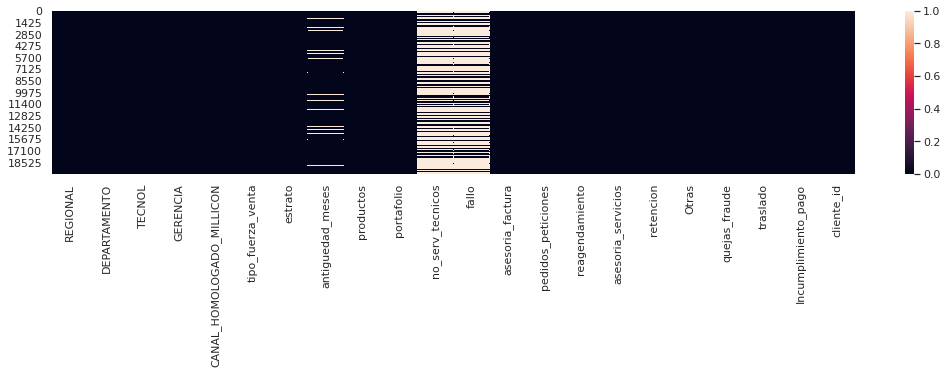

In [4]:
import seaborn as sns 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(18, 3))
ax = sns.heatmap(df.isna())

## Limpiar y crear nuevas columnas

*'no_serv_tecnicos'* contiene gran parte de los elementos vacíos o NaN en conjunción con *fallo*.
<br> Es posible reemplazar los datos faltantes en *no_serv_tecnicos* por 0 y asi aliviar posibles errores de graficacion que podrían surgir posteriormente en el ejercicio. 

In [5]:
# Replace Null in no_serv_tecnicos for 0. 
df['no_serv_tecnicos'] = df['no_serv_tecnicos'].fillna(0)
# df.describe()

Añadimos una nueva variable llamada *call* la cual tendrá el valor 1 en el caso de que el cliente haya realizado una llamada solicitando algún tipo de asesoría. 


In [6]:
df['call'] = (df['asesoria_factura'] | df['pedidos_peticiones'] | df['reagendamiento'] | df['asesoria_servicios'] | df['retencion'] | df['Otras'])
columns = ['REGIONAL','DEPARTAMENTO','antiguedad_meses','portafolio','estrato', 'call', 'Incumplimiento_pago', 'cliente_id']
data = df[columns]
data.head()

,REGIONAL,DEPARTAMENTO,antiguedad_meses,portafolio,estrato,call,Incumplimiento_pago,cliente_id
0,COSTA,MAGDALENA,19.0,Duo,3,0,0,1004369760
1,COSTA,MAGDALENA,19.0,Duo,3,0,0,1004369760
2,NOROCCIDENTE,ANTIOQUIA,1.0,Individual,1,0,0,1004371304
3,COSTA,MAGDALENA,7.0,Trio,3,0,1,1004382867
4,COSTA,MAGDALENA,7.0,Trio,3,0,1,1004382867


# Incumplimiento 
Teniendo en cuenta la definición del problema es importante analizar variables y relaciones que nos permitan identificar el *riesgo de no pago* de la primera factura. <br>
Por definición, la primera variable de interés es *incumplimiento_pago* y su agrupación y relación con las demás variables.

In [7]:
# funcion definida para imprimir el valor de la barra en los diagramas de barras.
def autolabel(ax, labels = None, mode='h'):
    """
    Attach a text label above each bar displaying its height
    Arguments:
        ax: sns or plt Ax class with the draws
        labels (optional): defual None, list of floats labels the same
        shape as Axes. 
    """
    if labels is None:
        labels = [rect.get_height() for rect in ax.patches]
        
    for rect, label in zip(ax.patches, labels):
        if mode == 'h':
            pos_height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width()/2., 1*pos_height,
                    '{:0.0f}'.format(float(label)),
                    ha='center', va='bottom')
        if mode == 'v':
            pos_width = rect.get_width()
            ax.text( 1*pos_width + 100, rect.get_y() + rect.get_height()+ 0.5,
                    '{:0.0f}'.format(float(label)),
                    ha='center', va='bottom')

Los incumplidos representan el 14.32% de los datos


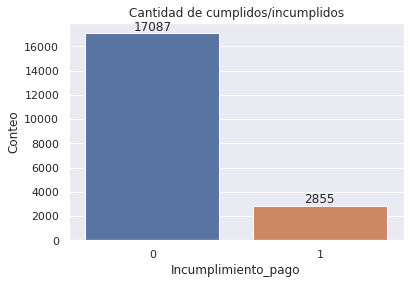

In [8]:
ax = sns.countplot(data=data, x='Incumplimiento_pago')
plt.title('Cantidad de cumplidos/incumplidos')
plt.ylabel('Conteo')
autolabel(ax)
count = data['Incumplimiento_pago'].value_counts()
prc = count[1]/(count[0]+count[1])
print(f'Los incumplidos representan el {prc*100:.2f}% de los datos')

# Analisis sociodemografico

Adicional al gráfico anterior, podemos calcular la proporción de incumplimiento para cada subconjunto regional

Incumplimiento_pago,0,1,Porcentage_incumplimiento
REGIONAL,,,
COSTA,1604,501,0.238005
CENTRO,1512,436,0.223819
ORIENTE,760,190,0.200000
SUR,1082,216,0.166410
NOROCCIDENTE,10289,1351,0.116065
EJE CAFETERO,1840,161,0.080460


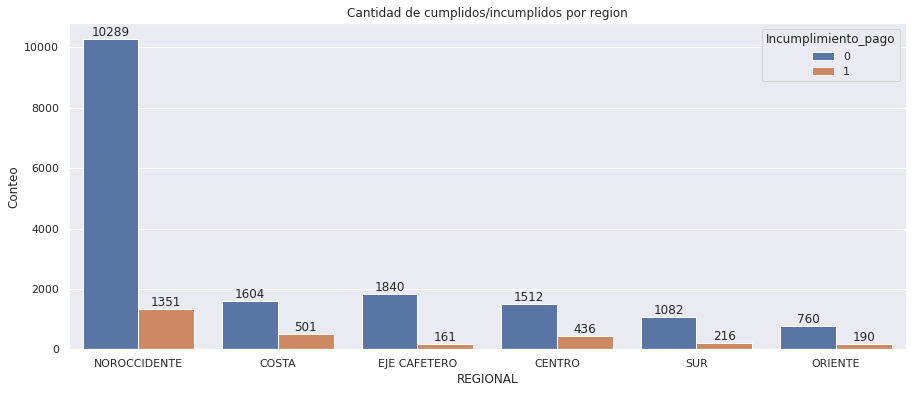

In [9]:
_, ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(data=data, x='REGIONAL', 
                   hue='Incumplimiento_pago', ax=ax,
                   order=data['REGIONAL'].value_counts().index)
plt.title('Cantidad de cumplidos/incumplidos por region')
plt.ylabel('Conteo')
autolabel(ax) 

# Agrupamos los datos por region y contamos el total de numero de clientes que cumplieron e incumplieron su facturacion
grouped = data.groupby(by=['REGIONAL', 'Incumplimiento_pago'])[['portafolio']].count()
pivot = pd.pivot_table(grouped, index='REGIONAL', columns='Incumplimiento_pago', values='portafolio')

# Calculmos el porcenta de incumplimiento para cada region y ordenamos en orden descendente. 
pivot['Porcentage_incumplimiento'] = pivot[1]/(pivot[0] + pivot[1])
pivot.sort_values('Porcentage_incumplimiento', ascending=False)

En la tabla y gráficos anteriores podemos ver que a nivel regional hay diferentes ratios de incumplimiento, siendo las zonas costa y centro las más determinantes con un 23% y 22% de incumplimiento respectivamente. En el otro extremo, tenemos las regiones de Noroccidental y el eje cafetero con porcentajes de incumplimiento de 10% y 8%. <br>
Estos resultados nos muestran un patrón importante con respecto a la región y el **riesgo de no pago**. Sin embargo, es importante verificar la fuerza y dirección de la tendencia a nivel más granular en los subconjuntos de cada región. 

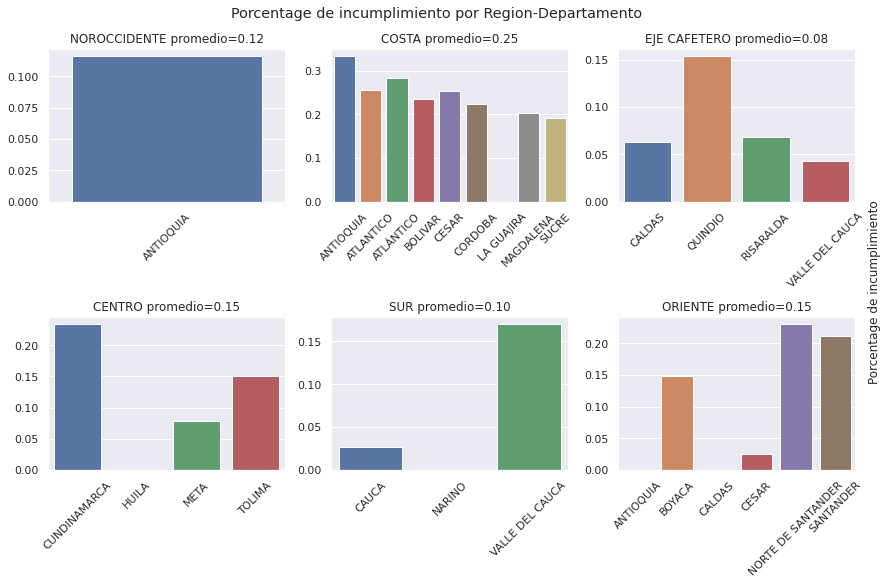

In [10]:
# Agrupamos los datos por region y departamento 
grouped = data.groupby(by=['REGIONAL','DEPARTAMENTO', 'Incumplimiento_pago'])[['portafolio']].count()
pivot = pd.pivot_table(grouped, index=['REGIONAL','DEPARTAMENTO'], columns='Incumplimiento_pago', values='portafolio')

# Calculmos el porcenta de incumplimiento para cada region y ordenamos en orden descendente. 
pivot['Porcentage_incumplimiento'] = pivot[1]/(pivot[0] + pivot[1])
pivot = pivot.reset_index()

f, axes = plt.subplots(2,3, figsize=(12, 8), constrained_layout=True)
axes= axes.ravel()
regions = data['REGIONAL'].value_counts().index
for region, ax in zip(regions, axes):
    frame = pivot.reset_index()
    frame = pivot[pivot['REGIONAL'] == region]
    ax = sns.barplot(x='DEPARTAMENTO', y='Porcentage_incumplimiento',
                data= frame, ax= ax)
    mean = frame['Porcentage_incumplimiento'].mean()
    ax.set_title(f'{region} promedio={mean:.2f}')
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.setp(ax.get_xticklabels(), rotation=45)

f.suptitle('Porcentage de incumplimiento por Region-Departamento', va='top')
_ =f.text(1,0.5,'Porcentage de incumplimiento', va='center',rotation='vertical')

Finalmente, con el anterior gráfico podemos visualizar de forma detallada las relaciones entre el porcentaje de incumplimiento reportado a nivel departamental y regional. Un primer caso sería la región costera donde todos los departamentos tienen un porcentaje de incumplimiento alrededor del 20% y un promedio del 25% siendo consistente con el incumplimiento total de la región reportado en 22%. Por otro lado, la región del eje cafetero nos reporta un incumplimiento del 8% sin embargo, a nivel departamental se encuentran diferencias significativas como el caso del Quindio donde el porcentaje de incumplimiento alcanza el 15%. <br>

Los anteriores resultados podrían sugerir que, pese a la tendencia general que se mantiene en algunas regiones, también hay presencia de datos atípicos por lo que ambas variables son importantes en el proceso de modelado. 

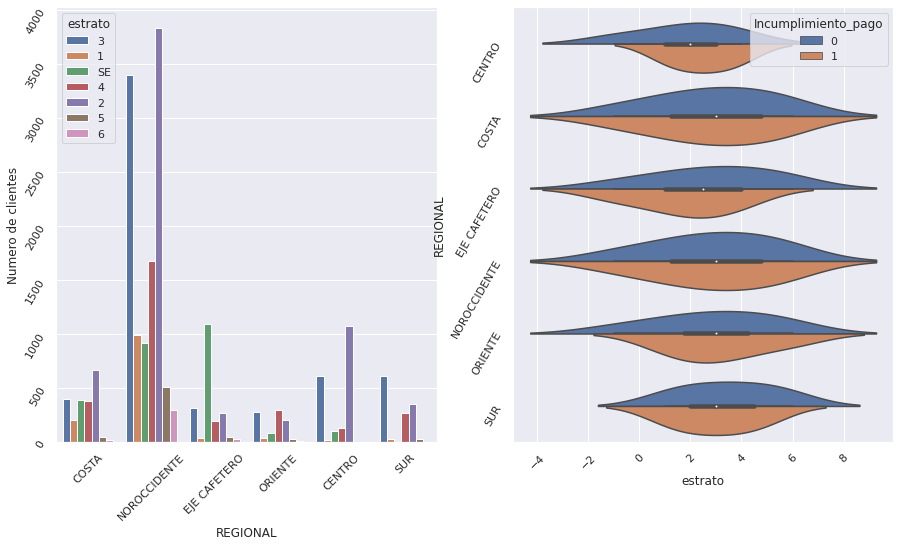

In [11]:
f, ax = plt.subplots(1, 2, figsize=(15, 8))
ax = ax.ravel()
sns.countplot(data= data, x='REGIONAL', hue='estrato', ax= ax[0])
ax[0].set_ylabel('Numero de clientes')

grp = data.groupby(by = ['REGIONAL','estrato','Incumplimiento_pago'])[['cliente_id']].count()
grp = grp[['cliente_id']].reset_index().rename(columns={'cliente_id': 'conteo'})
ax[1]= sns.violinplot(data=grp.replace({'estrato':'SE'}, -1), y='REGIONAL', x='estrato', 
                hue='Incumplimiento_pago', size='conteo', sizes=(1e2, 3e3), split=True)

_ = [plt.setp(axe.get_xticklabels(), rotation=45) for axe in ax]
_ = [plt.setp(axe.get_yticklabels(), rotation=60) for axe in ax]

Finalmente, es importante evaluar la distribución de estratos con respecto a las regiones y determinar si este es relevante al riesgo de no pago. En el primero de los gráficos anteriores podemos medir claramente la predominancia de los estratos 2, 3 y SE  en la mayoría de las regiones. <br>
Por otro lado, en el gráfico de violín (gráfico derecho) se visualiza la relación del estrato con el porcentaje de incumplimiento para las diferentes regiones, inicialmente podemos detectar que en la región del eje cafetero existe una  mayor tendencia al incumplimiento en los menores estratos sin embargo, esta conclusión podría no ser válida, ya que la mayoría de los clientes en esta región tienen un estrato SE el cual fue reemplazado por -1 induciendo la desviación en el gráfico.  Adicionalmente esta visualización nos permite determinar que el estrato podría no estar relacionado el problema, ya que ambas distribuciones (cumplidos e incumplidos) muestran un comportamiento similar en cada región. 

# Incumplimientos por portafolio.
Siguiendo un análisis similar queremos evaluar los portafolios adquiridos por los clientes y su relación con el incumplimiento de pagos.

In [12]:
data['portafolio'].value_counts()  # Contamos la cantidad de clientes que adquieren cada tipo de portafolio

Trio          7933
Individual    6729
Duo           5280
Name: portafolio, dtype: int64

El anterior conteo nos arroja una leve predominancia del producto *Trio* en el portafolio, sin embargo, los demás productos también tienen un número significativo de entradas. <br>
Luego del conteo, es importante establecer el porcentaje de incumplimiento para cada uno de los portafolios ofrecidos a los clientes.

Incumplimiento_pago,0,1,Incumplimiento_prc
portafolio,,,
Trio,6029,1904,0.240010
Duo,4760,520,0.098485
Individual,6298,431,0.064051


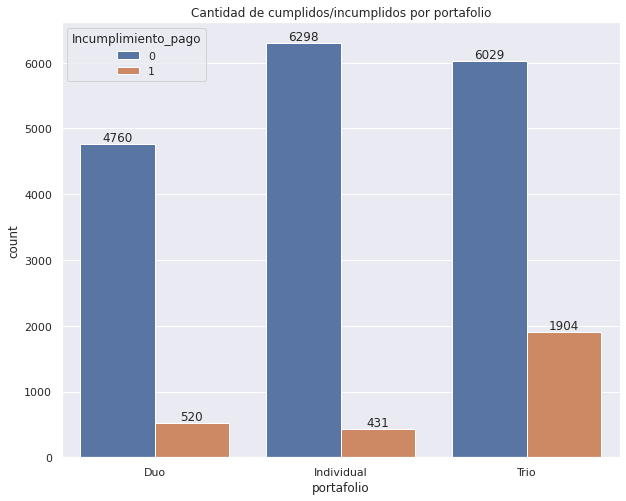

In [13]:
_, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(data= data, x='portafolio', hue='Incumplimiento_pago')
plt.title('Cantidad de cumplidos/incumplidos por portafolio')
autolabel(ax)
group= data.groupby(by=['portafolio', 'Incumplimiento_pago'])[['call']].count()
pv = pd.pivot_table(group, index='portafolio', columns='Incumplimiento_pago',  values='call')
pv['Incumplimiento_prc'] = pv[1]/(pv[0] + pv[1])
pv.sort_values('Incumplimiento_prc', ascending=False)

En este caso podemos visualizar que hay una gran diferenciación en el nivel de incumplimiento en relación con el portafolio. En total, los clientes que adquieren el producto *Trio* tienden a un porcentaje de incumplimiento del 24% a diferencia de los productos *Duo* e *Individual* con niveles del 9% y 6% respectivamente. 
Antes de continuar el análisis, es importante determinar si esta relación es resultado de algún tipo de sesgo con respecto a los subconjuntos regionales y de estrato.

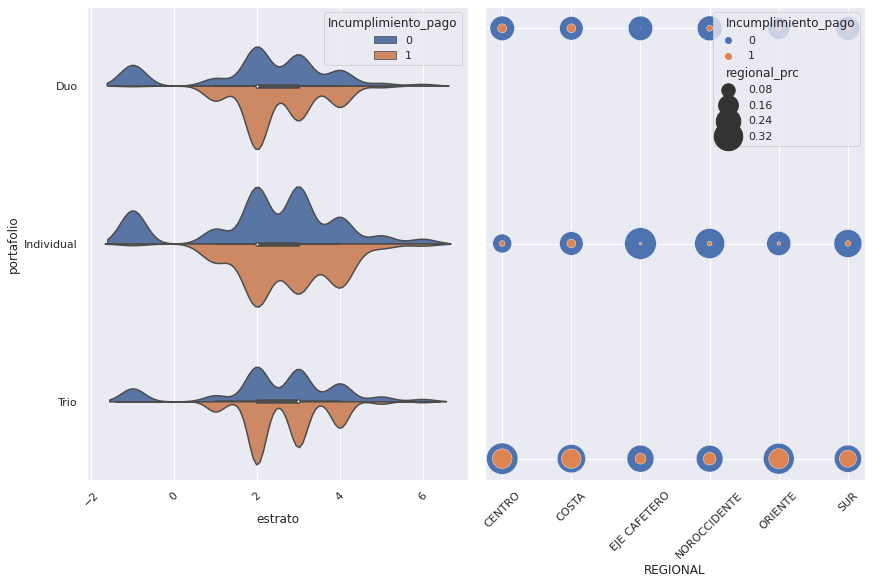

In [14]:
f, axes = plt.subplots(1, 2, figsize=(12, 8),  constrained_layout=True )
ax = axes.ravel()

sns.violinplot(data= data.replace({'estrato':'SE'}, -1), y='portafolio', x='estrato',
               hue='Incumplimiento_pago', split=True, ax= ax[0])

grp = data.groupby(by = ['REGIONAL','portafolio','Incumplimiento_pago'])[['cliente_id']].count()
grp = grp[['cliente_id']].reset_index().rename(columns={'cliente_id': 'conteo'})
total_per_region = data['REGIONAL'].value_counts()
grp['total_regional'] = total_per_region[grp['REGIONAL']].to_list()
grp['regional_prc'] = grp['conteo']/grp['total_regional']

sns.scatterplot(data= grp, x='REGIONAL', y='portafolio', size='regional_prc',
                hue='Incumplimiento_pago', ax=ax[1], sizes=(0.1, 1000))
ax[1].set_ylabel('')
ax[1].set_yticklabels('')

_ = [plt.setp(axe.get_xticklabels(), rotation=45) for axe in ax]

 Con respecto al portafolio podemos ver (en el gráfico izquierdo) que los diferentes subconjuntos de cumplimiento se comportan de forma similar para los diferentes estratos. Argumentos iniciales sugerirían que el nivel estratarial no tiene una relación directa con el tipo de portafolio adquirido ni con el nivel de cumplimiento respaldando las conclusiones expuestas en los ítems anteriores.  <br>
Por otro lado, el gráfico derecho nos muestra información valiosa sobre las regiones, el tipo de portafolio y el nivel de incumplimiento en cada uno de estos, respaldando la hipótesis de que en el producto *trio* el incumplimiento es mayor independientemente de la región del servicio.

# Relación entre llamadas del cliente e incumplimiento

Para visualizar esta relación primero generamos una nueva columna llamada 'cantidad_llamadas' la cual contendrá el conteo (sumatoria) de todas las llamadas de solicitud de asistencia realizadas por cada cliente. <br>
Posteriormente agrupamos los subconjuntos de cumplimiento y generamos medidas estadísticas, así como visualizaciones de distribución en diferentes rangos.

Cantidad de llamadas realizadas por el cliente


,count,mean,std,min,25%,50%,75%,max
Incumplimiento_pago,,,,,,,,
0,17087.0,0.180898,0.569209,0.0,0.0,0.0,0.0,6.0
1,2855.0,0.152014,0.526131,0.0,0.0,0.0,0.0,5.0


Ambos grupos (cumplidos e incumplidos) muestran la misma distribucion de llamadas realizadas


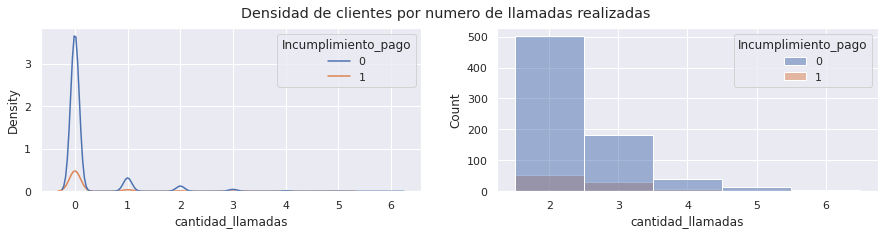

In [15]:
from pandas.plotting import parallel_coordinates
clms = ['asesoria_factura','pedidos_peticiones','reagendamiento','asesoria_servicios','retencion','Otras','Incumplimiento_pago']
calls_df = df[clms].copy()
calls_df['cantidad_llamadas'] = calls_df[clms[:-1]].sum(axis=1)
print('Cantidad de llamadas realizadas por el cliente')
display(calls_df.groupby(by='Incumplimiento_pago')['cantidad_llamadas'].describe())
_, ax = plt.subplots(1,2, figsize=(15, 3))
ax = ax.ravel()
plt.suptitle('Densidad de clientes por numero de llamadas realizadas')

sns.kdeplot(data=calls_df, x='cantidad_llamadas', hue='Incumplimiento_pago', ax=ax[0])

df_caller = calls_df[calls_df['cantidad_llamadas'] > 1]
sns.histplot(data=df_caller, x='cantidad_llamadas', hue='Incumplimiento_pago', ax= ax[1], discrete=True)
print('Ambos grupos (cumplidos e incumplidos) muestran la misma distribucion de llamadas realizadas')

Más del 75% de los clientes no llamaron. En promedio, el numero de llamadas realizadas por los clientes es de 0.17, esto significa 1.7 llamadas por cada 10 clientes **sin notorias diferencias** entre si cumplieron con el pago o no.

# Servicios tecnicos solicitados, tipo de fallo y cumplimiento 

El promedio de servicios tecnicos solicitados es: 
para el grupo de cumplidos: 0.36 servicios (3 por cada 10 clientes)
mientras que para los incumplidos 0.24 servicios (2 por cada 10 clientes)


Text(0.5, 1.0, 'Numero de clientes que solicitarion servicios tecnicos')

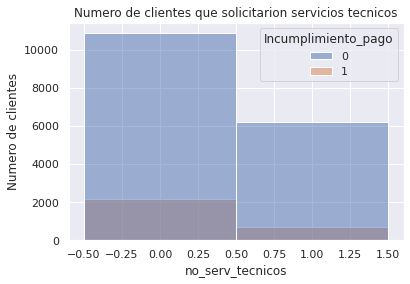

In [16]:
grp = df.groupby(by=['Incumplimiento_pago'])['no_serv_tecnicos'].mean()
ax = sns.histplot(data=df, x='no_serv_tecnicos', hue='Incumplimiento_pago', discrete=True)
ax.set_ylabel('Numero de clientes')
ax.set_ylabel('Numero de clientes')
print(f"El promedio de servicios tecnicos solicitados es: \n"
      f"para el grupo de cumplidos: {grp[0]:.2f} servicios (3 por cada 10 clientes)\n"
      f"mientras que para los incumplidos {grp[1]:.2f} servicios (2 por cada 10 clientes)")
plt.title('Numero de clientes que solicitarion servicios tecnicos')

La cantidad promedio de servicios técnicos solicitados es similar para ambos subconjuntos de clientes (cumplidos e incumplidos) por lo que no se encuentra una relación importante entre estas variables. Posteriormente, se busca analizar el tipo de fallo reportado en busca de más correlaciones con el incumplimiento. 

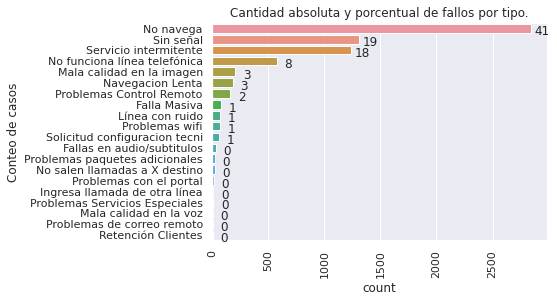

In [17]:
percen = df['fallo'].value_counts()/ df['fallo'].count()

percen = [perc * 100 for perc in percen.to_list()]
ax = sns.countplot(data= df, y='fallo', order = df['fallo'].value_counts().index)

_ = plt.xticks(rotation=90)
plt.title('Cantidad absoluta y porcentual de fallos por tipo.')
plt.ylabel('Conteo de casos')
autolabel(ax, labels= percen, mode='v')

El mayor número de  reportes corresponden a fallos por *'No navega'* que representan el 40% de los casos. 
Adicionalmente, el 90% de los datos están definidos en las categorías  *'No navega'* *'Sin señal'* *'Servicio intermitente'* *'No funciona línea telefónica'* y  *'Mala calidad en la imagen'* por lo que se continuará el análisis con estos.

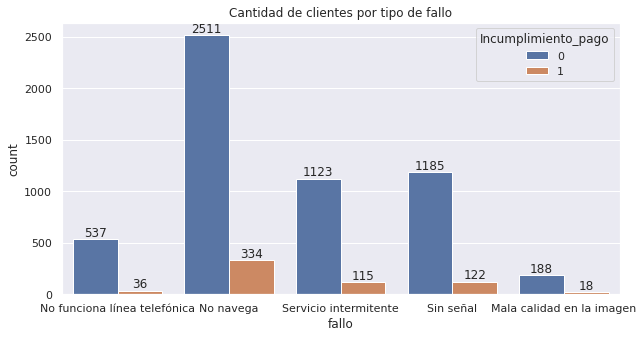

In [18]:
fails_df = df[(df['fallo']== 'No navega') | ( df['fallo']== 'Sin señal') 
             |(df['fallo']== 'Servicio intermitente') | (df['fallo']== 'No funciona línea telefónica')
             |(df['fallo']== 'Mala calidad en la imagen')]

_, ax = plt.subplots(figsize=(10, 5))
ax = sns.countplot(data= fails_df, x='fallo', hue='Incumplimiento_pago')
plt.title('Cantidad de clientes por tipo de fallo')
autolabel(ax)
# df.groupby(by='fallo')['Incumplimiento_pago'].count().sort_values()

In [19]:
group= fails_df.groupby(by=['fallo', 'Incumplimiento_pago'])[['cliente_id']].count()
pv = pd.pivot_table(group, index='fallo', columns='Incumplimiento_pago', values='cliente_id')
pv['Incumplimiento_prc'] = pv[1]/(pv[0] + pv[1])
pv.sort_values('Incumplimiento_prc', ascending=False)

Incumplimiento_pago,0,1,Incumplimiento_prc
fallo,,,
No navega,2511,334,0.117399
Sin señal,1185,122,0.093344
Servicio intermitente,1123,115,0.092892
Mala calidad en la imagen,188,18,0.087379
No funciona línea telefónica,537,36,0.062827


Finalmente se realiza un análisis similar a los anteriores donde se establece el nivel de incumplimiento de los clientes en relación con los fallos reportados. Dicho análisis no permite establecer patrones fuertes entre ambas variables, ya que se obtienen porcentajes de incumplimiento alrededor del 9% para todos los subconjuntos de fallos reportados con diferencias mínimas. 

# Análisis de correlación
Se realiza un análisis de correlación con el método Pearson principalmente para medir la direccionalidad de la relación entre las variables numéricas e imprimimos los valores positivos y negativos de forma independientes y  ordenadas.


In [20]:
df_crr = df.corr()
df_crr[df_crr['Incumplimiento_pago'] > 0]['Incumplimiento_pago'].sort_values(ascending=False)

Incumplimiento_pago    1.000000
cliente_id             0.081952
Otras                  0.011687
quejas_fraude          0.010103
Name: Incumplimiento_pago, dtype: float64

In [21]:
df_crr = df.corr()
df_crr[df_crr['Incumplimiento_pago'] < 0]['Incumplimiento_pago'].sort_values(ascending=True)

antiguedad_meses     -0.150507
no_serv_tecnicos     -0.089101
asesoria_factura     -0.021996
asesoria_servicios   -0.019946
call                 -0.019556
retencion            -0.012425
reagendamiento       -0.008957
traslado             -0.006498
pedidos_peticiones   -0.000021
Name: Incumplimiento_pago, dtype: float64

La mayoría de variables son categóricas codificadas como números (0,1),  por lo cual el análisis de correlación no muestra mayor información a excepción de *antiguedad_meses*  que es numérica y continua. Dicha variable muestra una correlación inversa de -0.15 que no representa una relación muy fuerte, pero podría ser importante para el modelado. 


# Antiguedad y cumplimiento

,count,mean,std,min,25%,50%,75%,max
Incumplimiento_pago,,,,,,,,
0,15654.0,46.846621,62.265918,0.0,4.0,19.0,58.0,337.0
1,2610.0,20.881226,40.996710,0.0,3.0,5.0,17.0,203.0


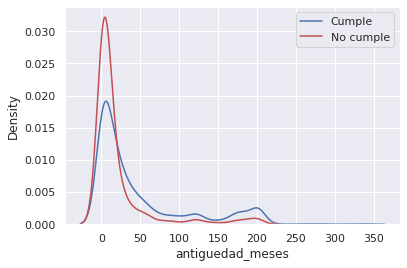

In [22]:
display(data.groupby(by='Incumplimiento_pago')['antiguedad_meses'].describe())
sns.kdeplot(data[data['Incumplimiento_pago']==0]['antiguedad_meses'], color='b')
sns.kdeplot(data[data['Incumplimiento_pago']==1]['antiguedad_meses'], color='r')
plt.legend(['Cumple', 'No cumple'])

In [23]:
median = data.groupby(by='Incumplimiento_pago')['antiguedad_meses'].median()
print(f'La mediana de las personas que no cumplen es {median[1]} meses a diferencia de los cumplidos que tienen una mediana de {median[0]} mese de antiguedad')

La mediana de las personas que no cumplen es 5.0 meses a diferencia de los cumplidos que tienen una mediana de 19.0 mese de antiguedad


La antigüedad promedio de las personas que **no cumplen es de 20 meses** con una desviación estándar alta de 46 meses, por otro lado el conjunto de las personas que cumplen tiene una media de 46 meses sugiriendo que los clientes más longevos son más cumplidos. Otra perspectiva que podría secundar esto es que el 50% de las personas que no cumplen llevan **menos de 5 meses** siendo clientes (*17 meses para el 75%*) mientras que el 50% de los que **si cumplen** están por encima de los 20 meses. <br>
Con ayuda del gráfico de densidad podemos verificar esta hipótesis, cuando el eje x tiende a 0 (x→0) vemos que el número de personas que no cumplen (rojo) supera las que si cumplen, mientras que en el caso que x tiende a infinito (x → grande) la densidad de los que sí cumplen (azul), es mayor. 

# Conclusiones 
 
Se realizó un análisis exploratorio de los datos en busca de variables y correlaciones que permitan determinar el nivel de riesgo de no pago de la primera factura. <br>
A primera vista la mayoría de las columnas presentes contienen información categórica que debe ser analizada a través de gráficos que permitan establecer relaciones entre ellas. <br>
Definiendo Incumplimiento_pago como la variable objetiva, se analizó su comportamiento en relación con demás las variables para así definir cuáles de estas son pertinentes para el establecimiento del nivel de riesgo. <br>

* Los primeros resultados importantes se hallaron a nivel **regional**, donde encontramos **diferencias significativas en el nivel de incumplimiento** entre regiones siendo la costa y centro las más determinantes con un 23% y 22% de incumplimiento respectivamente en contraste con la región Noroccidental y el eje cafetero con incumplimientos del 10% y 8%.  Adicionalmente se verificó que esta tendencia se mantiene a nivel departamental, pero se encontraron datos ajenos por lo que *se recomienda usar ambas variables* en el proceso de modelado.

* Evaluando diferencias con relación al **tipo de portafolio** adquirido, encontramos un *mayor porcentaje de personas incumplidas* para el caso de tipo *trio*. Adicionalmente, pudimos verificar esta tendencia a nivel regional donde se ve claramente que los clientes con este tipo de portafolio son más incumplidos independiente de la región.

* En lo que se refiere al **estrato** concluimos que **no hay una relación** visible entre este y el incumplimiento del pago, dicho argumento se verificó a nivel regional y de portafolios donde encontramos que el porcentaje de incumplimiento no varía según el estrato del cliente.

* Adicionalmente, se analizó el **número de servicios técnicos solicitados** y el **tipo de fallo** reportados para discernir su relación con el incumplimiento. Estos resultados sugiere que **no hay una fuerte correlación** entre las solicitudes de soporte y el incumplimiento de la factura.

* Finalmente, el análisis de correlación muestra una **relación inversa significativa** entre la **antigüedad de los clientes** y el  nivel de incumplimiento, sugiriendo que los clientes más nuevos presentan un mayor riesgo de no pago.

### Perfiles de riesgo

Teniendo en cuenta las tendencias enunciadas en las conclusiones anteriores, el conjunto de perfiles con mayor riesgo de no pago estaría definido por aquellos clientes ubicados principalmente en la región costera y centro, con una antigüedad no mayor a 30 meses y que hayan adquirido el portafolio de tipo *trio*. 


